In [1]:
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from emle_bespoke._constants import HARTREE_TO_KJ_MOL

In [2]:
data = scipy.io.loadmat("/home/joaomorado/mnsol_sampling/LJ/ligand_plot_data.mat")
n_samples_per_curve = 8
energy_scale = 1.0
for key in data:
    if "__" not in key:
        data[key] /= energy_scale

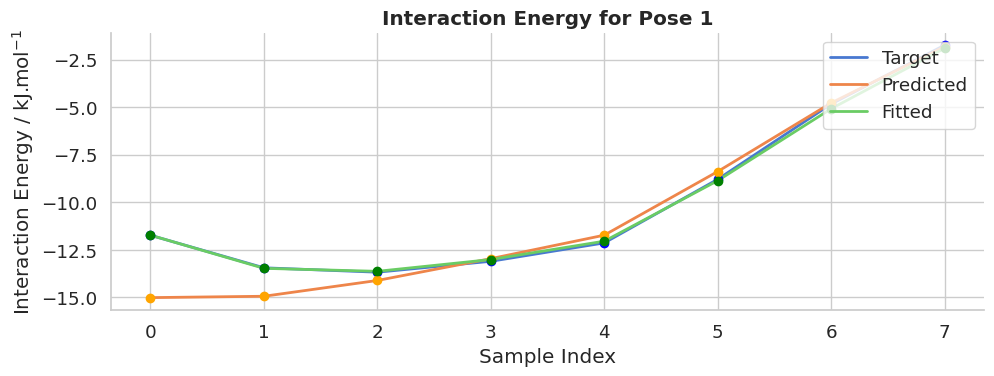

In [3]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

n_curves = len(data["e_int_target"][0]) // n_samples_per_curve
fig, axes = plt.subplots(n_curves, 1, figsize=(10, 4 * n_curves), sharex=True)
if n_curves == 1:
    axes = [axes]

for idx, ax in enumerate(axes):
    ni = idx * n_samples_per_curve
    nf = (idx + 1) * n_samples_per_curve
    ax.plot(data["e_int_target"][0][ni:nf], label="Target", lw=2)
    ax.plot(data["e_int_predicted"][0][ni:nf], label="Predicted", lw=2)
    ax.plot(data["e_int_fitted"][0][ni:nf], label="Fitted", lw=2)
    ax.scatter(
        range(0, n_samples_per_curve),
        data["e_int_target"][0][ni:nf],
        color="blue",
        zorder=5,
    )
    ax.scatter(
        range(0, n_samples_per_curve),
        data["e_int_predicted"][0][ni:nf],
        color="orange",
        zorder=5,
    )
    ax.scatter(
        range(0, n_samples_per_curve),
        data["e_int_fitted"][0][ni:nf],
        color="green",
        zorder=5,
    )
    ax.set_title(f"Interaction Energy for Pose {idx + 1}", fontweight="bold")
    ax.set_xlabel("Sample Index")
    ax.set_ylabel("Interaction Energy / kJ.mol$^{-1}$")
    ax.legend(loc="upper right")

# Adjust spacing
sns.despine()
plt.tight_layout()
plt.show()